<a href="https://colab.research.google.com/github/Coolinglass/Applied-Machine-Learning-Projects/blob/master/Lokesh_NYC_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**NYC Taxi Trip Duration Prediction**


Ride-hailing services, like Uber and Lyft, leverage online platforms
to link passengers with local drivers using personal vehicles, often
offering a more affordable and convenient alternative to traditional
taxis.

Enhancing the efficiency of these services' taxi dispatch systems
hinges on predicting the duration a driver's taxi will be occupied.
Accurate forecasts of ride completion times enable dispatchers to
optimally assign drivers to pickup requests.

In [119]:
#Importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/Analytics Vidhya/Seventh Assignment/nyc_taxi_trip_duration.csv')

In [4]:
#explorting the dataset to understand rows and column values
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


**Data Description:**

*  id - A unique identifier for each tri2
*  Vendor_id- a code indicating the provider associated with the trip record
*  Pickup_datetime - date and time when the meter was engaged
*  Dropoff_datetime - date and time when the meter was disengaged
*  Passenger_count -the number of passengers in the vehicle (driver entered value)
* Pickup_longitude -the longitude where the meter was engaged
* Dropoff_longitude -the longitude where the meter was disengaged
* Dropoff_latitude -the latitude where the meter was disengaged
* Store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor(Y=store and forward; N=not a store and forward trip List item)
* Listrip_duration -
(target) duration of the trip in secondst item

In [5]:
data = data.reset_index(drop=True)

In [6]:
data.columns
data.shape

(729322, 11)

In [7]:
#understanding data types of each object and running individual code to identify integer float and objects
data.dtypes

,0
id,object
vendor_id,int64
pickup_datetime,object
dropoff_datetime,object
passenger_count,int64
pickup_longitude,float64
pickup_latitude,float64
dropoff_longitude,float64
dropoff_latitude,float64
store_and_fwd_flag,object


In [8]:
data.dtypes[data.dtypes == 'int64']

,0
vendor_id,int64
passenger_count,int64
trip_duration,int64


In [9]:
data.dtypes[data.dtypes == 'float']

,0
pickup_longitude,float64
pickup_latitude,float64
dropoff_longitude,float64
dropoff_latitude,float64


In [10]:
data.dtypes[data.dtypes == 'category']

,0


In [11]:
#converting data types to date&time
date = pd.DatetimeIndex(data[('pickup_datetime')])

In [12]:
date

DatetimeIndex(['2016-02-29 16:40:21', '2016-03-11 23:35:37',
               '2016-02-21 17:59:33', '2016-01-05 09:44:31',
               '2016-02-17 06:42:23', '2016-02-14 18:31:42',
               '2016-04-20 20:30:14', '2016-06-19 16:48:14',
               '2016-03-28 19:17:03', '2016-04-10 22:01:41',
               ...
               '2016-01-01 00:47:30', '2016-02-05 11:24:34',
               '2016-03-21 03:43:03', '2016-06-28 06:41:53',
               '2016-01-25 22:31:56', '2016-05-21 13:29:38',
               '2016-02-22 00:43:11', '2016-04-15 18:56:48',
               '2016-06-19 09:50:47', '2016-01-01 17:24:16'],
              dtype='datetime64[ns]', name='pickup_datetime', length=729322, freq=None)

In [13]:
# extracting new columns from "pickp_updatetime" to understand if our target value duration has any impacts on the day/week/month/hour/minute

# last day of year when transaction was done
data['doy_ls_tran_pickup'] = date.dayofyear

# week of year when last transaction was done
#data['woy_ls_tran_pickup'] = date.dt.isocalendar().week

# month of year when last transaction was done
data['moy_ls_tran_pickup'] = date.month

# day of week when last transaction was done
data['dow_ls_tran_pickup'] = date.dayofweek

#hours
data['hrs_of_day_pickup'] = date.hour

#minutes
data['minute_of_day_pickup'] = date.minute

#seconds
data['seconds_of_day_pickup'] = date.second

In [14]:
date1 = pd.DatetimeIndex(data[('dropoff_datetime')])

In [15]:
date1

DatetimeIndex(['2016-02-29 16:47:01', '2016-03-11 23:53:57',
               '2016-02-21 18:26:48', '2016-01-05 10:03:32',
               '2016-02-17 06:56:31', '2016-02-14 18:55:57',
               '2016-04-20 20:36:51', '2016-06-19 17:06:35',
               '2016-03-28 19:48:29', '2016-04-10 22:25:30',
               ...
               '2016-01-01 01:12:56', '2016-02-05 11:46:39',
               '2016-03-21 04:05:21', '2016-06-28 06:43:43',
               '2016-01-25 22:39:25', '2016-05-21 13:34:34',
               '2016-02-22 00:48:26', '2016-04-15 19:08:01',
               '2016-06-19 09:58:14', '2016-01-01 17:44:40'],
              dtype='datetime64[ns]', name='dropoff_datetime', length=729322, freq=None)

In [16]:
# extracting new columns from "dropoff_updatetime"

# last day of year when dropoff was done
data['doy_ls_tran_drop_off'] = date1.dayofyear

# week of year when last transaction was done
#data['woy_ls_tran_drop_off'] = date1.isocalendar().week

# month of year when dropoff was done
data['moy_ls_tran_drop_off'] = date1.month

# day of week when dropoff was done
data['dow_ls_tran_drop_off'] = date1.dayofweek

#hours
data['hrs_of_day_drop_off'] = date1.hour

#MINUTES
data['minute_of_day_drop_off'] = date1.minute

#SECONDS
data['seconds_of_day_drop_off'] = date1.second

In [17]:
print("Duplicate indices:", data.index[data.index.duplicated()])

Duplicate indices: Index([], dtype='int64')


In [18]:
data[['pickup_datetime','doy_ls_tran_pickup','moy_ls_tran_pickup','dow_ls_tran_pickup','dropoff_datetime','hrs_of_day_pickup','minute_of_day_pickup','seconds_of_day_pickup','doy_ls_tran_drop_off','moy_ls_tran_drop_off','dow_ls_tran_drop_off','hrs_of_day_drop_off','minute_of_day_drop_off','seconds_of_day_drop_off']].head()

,pickup_datetime,doy_ls_tran_pickup,moy_ls_tran_pickup,dow_ls_tran_pickup,dropoff_datetime,hrs_of_day_pickup,minute_of_day_pickup,seconds_of_day_pickup,doy_ls_tran_drop_off,moy_ls_tran_drop_off,dow_ls_tran_drop_off,hrs_of_day_drop_off,minute_of_day_drop_off,seconds_of_day_drop_off
0,2016-02-29 16:40:21,60,2,0,2016-02-29 16:47:01,16,40,21,60,2,0,16,47,1
1,2016-03-11 23:35:37,71,3,4,2016-03-11 23:53:57,23,35,37,71,3,4,23,53,57
2,2016-02-21 17:59:33,52,2,6,2016-02-21 18:26:48,17,59,33,52,2,6,18,26,48
3,2016-01-05 09:44:31,5,1,1,2016-01-05 10:03:32,9,44,31,5,1,1,10,3,32
4,2016-02-17 06:42:23,48,2,2,2016-02-17 06:56:31,6,42,23,48,2,2,6,56,31


In [19]:
data.dtypes
pd.set_option('display.max_columns', None)

In [20]:
#viewing after all columns is converted into the right category types
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,doy_ls_tran_pickup,moy_ls_tran_pickup,dow_ls_tran_pickup,hrs_of_day_pickup,minute_of_day_pickup,seconds_of_day_pickup,doy_ls_tran_drop_off,moy_ls_tran_drop_off,dow_ls_tran_drop_off,hrs_of_day_drop_off,minute_of_day_drop_off,seconds_of_day_drop_off
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400,60,2,0,16,40,21,60,2,0,16,47,1
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100,71,3,4,23,35,37,71,3,4,23,53,57
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635,52,2,6,17,59,33,52,2,6,18,26,48
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141,5,1,1,9,44,31,5,1,1,10,3,32
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848,48,2,2,6,42,23,48,2,2,6,56,31


In [21]:
#viewing the distance between latitude and longitude to try and capture the distance.

#data['diff_in_pickup_longitude'] = data['pickup_longitude'] - data['dropoff_longitude']
#data['diff_in_pickup_latitude'] = data['pickup_latitude'] - data['dropoff_latitude']
data['vendor_id'].value_counts()

,count
vendor_id,
2,390481
1,338841


In [22]:
#converting trip duration in seconds to minutes
data['trip_duration']=data['trip_duration']/60


In [25]:
!pip install mpu
import numpy as np
import mpu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.7/69.7 kB 3.0 MB/s eta 0:00:00


In [26]:
# Calculate Haversine distance for each row
#converting geo latitudes and longitudes into Kms to understand the distance of duration for each trips.
data['haversine_dist'] = data.apply(
    lambda x: mpu.haversine_distance(
        (x['pickup_latitude'], x['pickup_longitude']),
        (x['dropoff_latitude'], x['dropoff_longitude'])
    ),
    axis=1
)

In [27]:
#Datatable after everything is converted. Here we are finished with variable assignment
data

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,doy_ls_tran_pickup,moy_ls_tran_pickup,dow_ls_tran_pickup,hrs_of_day_pickup,minute_of_day_pickup,seconds_of_day_pickup,doy_ls_tran_drop_off,moy_ls_tran_drop_off,dow_ls_tran_drop_off,hrs_of_day_drop_off,minute_of_day_drop_off,seconds_of_day_drop_off,haversine_dist
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,6.666667,60,2,0,16,40,21,60,2,0,16,47,1,1.199073
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,18.333333,71,3,4,23,35,37,71,3,4,23,53,57,4.129111
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,27.250000,52,2,6,17,59,33,52,2,6,18,26,48,7.250753
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,19.016667,5,1,1,9,44,31,5,1,1,10,3,32,2.361097
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,14.133333,48,2,2,6,42,23,48,2,2,6,56,31,4.328534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
729317,id3905982,2,2016-05-21 13:29:38,2016-05-21 13:34:34,2,-73.965919,40.789780,-73.952637,40.789181,N,4.933333,142,5,5,13,29,38,142,5,5,13,34,34,1.120223
729318,id0102861,1,2016-02-22 00:43:11,2016-02-22 00:48:26,1,-73.996666,40.737434,-74.001320,40.731911,N,5.250000,53,2,0,0,43,11,53,2,0,0,48,26,0.728705
729319,id0439699,1,2016-04-15 18:56:48,2016-04-15 19:08:01,1,-73.997849,40.761696,-74.001488,40.741207,N,11.216667,106,4,4,18,56,48,106,4,4,19,8,1,2.298776
729320,id2078912,1,2016-06-19 09:50:47,2016-06-19 09:58:14,1,-74.006706,40.708244,-74.013550,40.713814,N,7.450000,171,6,6,9,50,47,171,6,6,9,58,14,0.846316


In [28]:
#finding mean duration for trip duration & distance in minutes
print(data['haversine_dist'].mean())
print(data['trip_duration'].mean())

3.4411386475467722
15.870485555991268


Insights: On average each trip takes about 3.4 kilometers and 15.37 minutes to complete

Hypothesis/EDA Generation:
1. Trip_duration/haversine distance has a normal distribution.
2. No skewness/kurtosis present.
3. Traffic will have significant effect on trip durations
4. Weather will have significant effect on trip durations
5. Road blockage will have significant effect on trip durations
6. Start time will have significant effect on trip durations
7. Start day will have significant effect on trip durations
8. Speed will have significant effect on trip durations.
9. Location of final destination and start destination will have a significant effect on the trip durations.
10. Type of car will have effect on trip durations
11. Does number of passengers have any effect?


#Performing Univariate analysis on single variable trip_duration to understand the data better with EDA.

    

In [29]:
def UVA_numeric(data, var_group):
  '''
  Univariate_Analysis_numeric
  takes a group of variables (INTEGER and FLOAT) and plot/print all the descriptives and properties along with KDE.

  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it
  '''

  size = len(var_group)
  plt.figure(figsize = (7*size,3), dpi = 100)

  #looping for each variable
  for j,i in enumerate(var_group):

    # calculating descriptives of variable
    mini = data[i].min()
    maxi = data[i].max()
    ran = data[i].max()-data[i].min()
    mean = data[i].mean()
    median = data[i].median()
    st_dev = data[i].std()
    skew = data[i].skew()
    kurt = data[i].kurtosis()

    # calculating points of standard deviation
    points = mean-st_dev, mean+st_dev

    #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.kdeplot(data[i], fill=True)
    sns.lineplot(x=points, y=[0,0], color = 'black', label = "std_dev")
    sns.scatterplot(x=[mini,maxi], y=[0,0], color = 'orange', label = "min/max")
    sns.scatterplot(x=[mean], y=[0], color = 'red', label = "mean")
    sns.scatterplot(x=[median], y=[0], color = 'blue', label = "median")
    plt.xlabel('{}'.format(i), fontsize = 20)
    plt.ylabel('density')
    plt.title('std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format((round(points[0],2),round(points[1],2)),
                                                                                                   round(kurt,2),
                                                                                                   round(skew,2),
                                                                                                   (round(mini,2),round(maxi,2),round(ran,2)),
                                                                                                   round(mean,2),
                                                                                                   round(median,2)))
    plt.show()

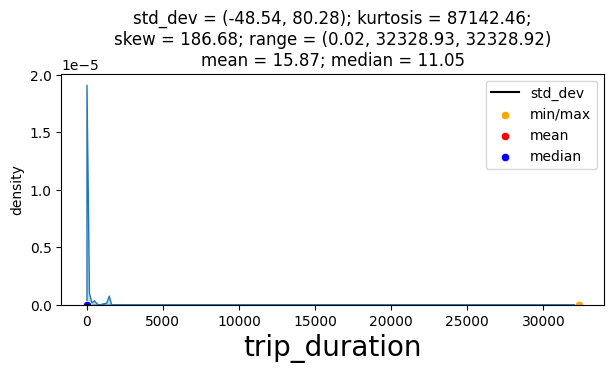

In [30]:
UVA_numeric(data, ['trip_duration'])


Considering the kurtosis and skewness for all the values, outliers/extreme values are present.

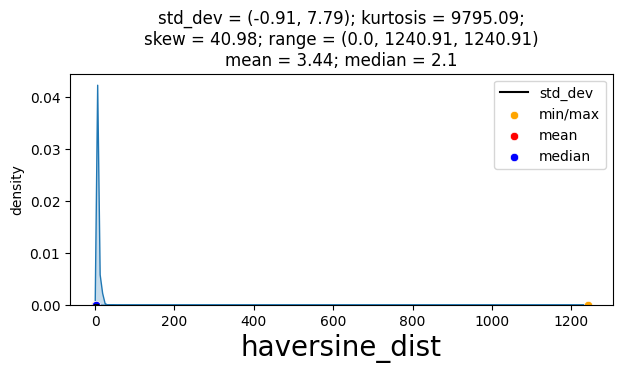

In [31]:
UVA_numeric(data, ['haversine_dist'])

In [32]:
#Understanding all the values with no of passengers taking the trip.
data['passenger_count'].value_counts()

,count
passenger_count,
1,517415
2,105097
5,38926
3,29692
6,24107
4,14050
0,33
7,1
9,1


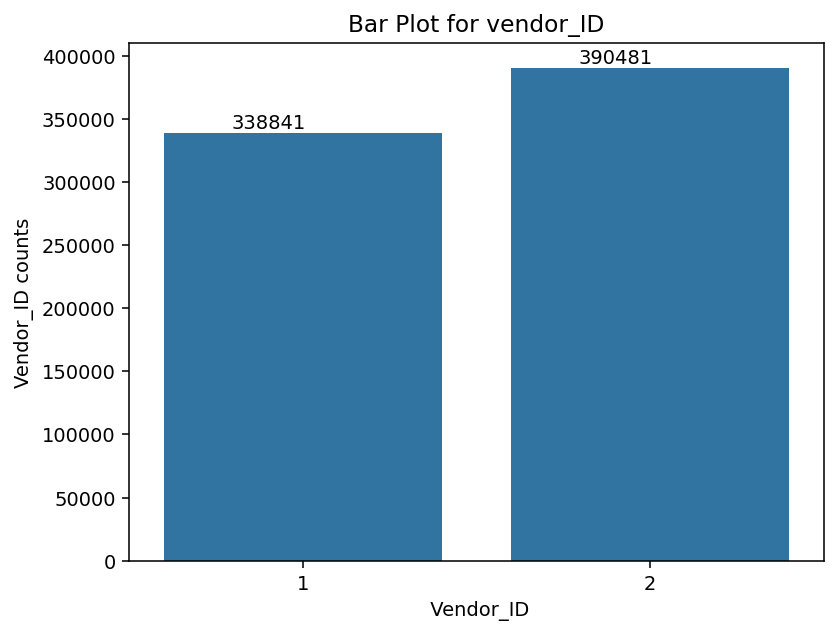

In [33]:
#segreating variables into group to perform univariate analysis.
#performing univariate analysis of categorical variables vendor_id and passenger_count
#performing bar charts.

plt.figure(dpi = 140)
ax= sns.barplot(x=data['vendor_id'].value_counts().index, y= data['vendor_id'].value_counts().values)
plt.xlabel(" Vendor_ID")
plt.ylabel('Vendor_ID counts')
plt.title("Bar Plot for vendor_ID")
for p in ax.patches:
        ax.annotate('{:1.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
plt.show()



No significant difference between Vendor 1 & 2

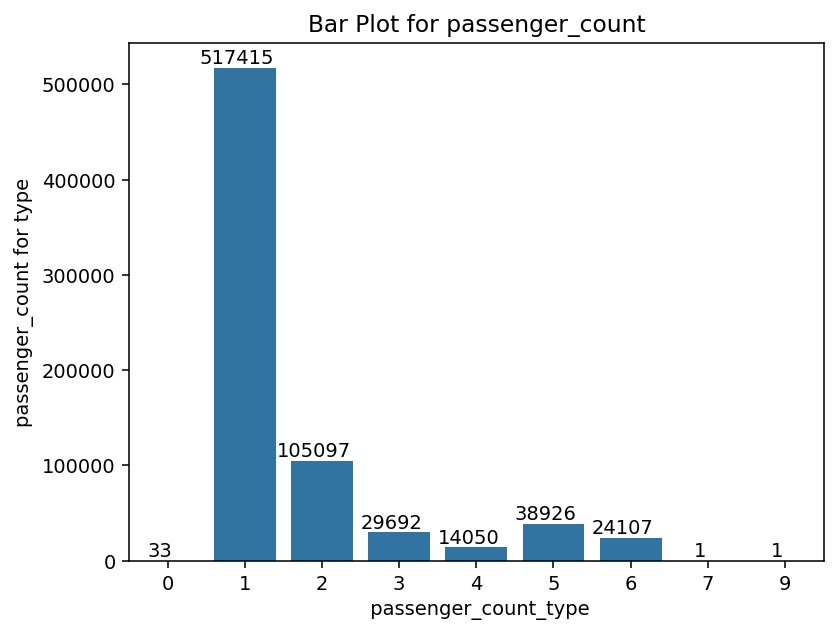

In [34]:
plt.figure(dpi = 140)
ax= sns.barplot(x=data['passenger_count'].value_counts().index, y= data['passenger_count'].value_counts().values)
plt.xlabel(" passenger_count_type")
plt.ylabel('passenger_count for type')
plt.title("Bar Plot for passenger_count")
for p in ax.patches:
        ax.annotate('{:1.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
plt.show()
#values of 7,9 are either outliers or it has been entered due to error

In [35]:
#determining percentage for passenger_counts type
f= data['passenger_count'].value_counts()
f


i=f[:]/sum (f[:])
print (str(round(i, 2)))


passenger_count
1    0.71
2    0.14
5    0.05
3    0.04
6    0.03
4    0.02
0    0.00
7    0.00
9    0.00
Name: count, dtype: float64


In [36]:
#checking for missing values before data can be processed for model building
data.isnull().sum()

,0
id,0
vendor_id,0
pickup_datetime,0
dropoff_datetime,0
passenger_count,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,0
dropoff_latitude,0
store_and_fwd_flag,0


In [37]:
# custom function for easy outlier analysis

def UVA_outlier(data, var_group, include_outlier = True):
  '''
  Univariate_Analysis_outlier:
  takes a group of variables (INTEGER and FLOAT) and plot/print boplot and descriptives\n
  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it \n\n

  data : dataframe from which to plot from\n
  var_group : {list} type Group of Continuous variables\n
  include_outlier : {bool} whether to include outliers or not, default = True\n
  '''

  size = len(var_group)
  plt.figure(figsize = (7*size,4), dpi = 100)

  #looping for each variable
  for j,i in enumerate(var_group):

    # calculating descriptives of variable
    quant25 = data[i].quantile(0.25)
    quant75 = data[i].quantile(0.75)
    IQR = quant75 - quant25
    med = data[i].median()
    whis_low = med-(1.5*IQR)
    whis_high = med+(1.5*IQR)

    # Calculating Number of Outliers
    outlier_high = len(data[i][data[i]>whis_high])
    outlier_low = len(data[i][data[i]<whis_low])

    if include_outlier == True:
      print(include_outlier)
      #Plotting the variable with every information
      plt.subplot(1,size,j+1)
      sns.boxplot(data[i], orient="v")
      plt.ylabel('{}'.format(i))
      plt.title('With Outliers\nIQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                   round(IQR,2),
                                                                                                   round(med,2),
                                                                                                   (round(quant25,2),round(quant75,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))

    else:
      # replacing outliers with max/min whisker
      data2 = data[var_group][:]
      data2[i][data2[i]>whis_high] = whis_high+1
      data2[i][data2[i]<whis_low] = whis_low-1

      # plotting without outliers
      plt.subplot(1,size,j+1)
      sns.boxplot(data2[i], orient="v")
      plt.ylabel('{}'.format(i))
      plt.title('Without Outliers\nIQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                   round(IQR,2),
                                                                                                   round(med,2),
                                                                                                   (round(quant25,2),round(quant75,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))

True
True


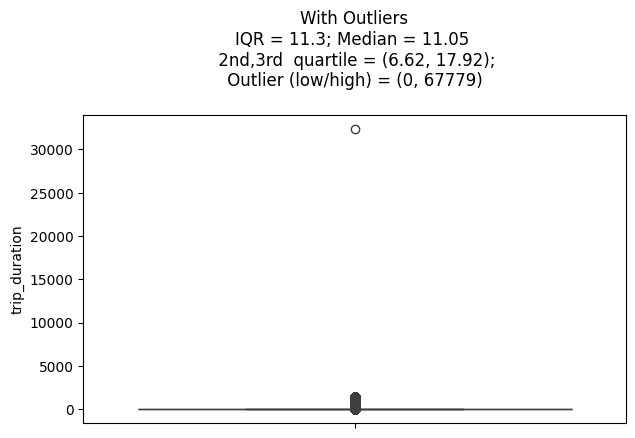

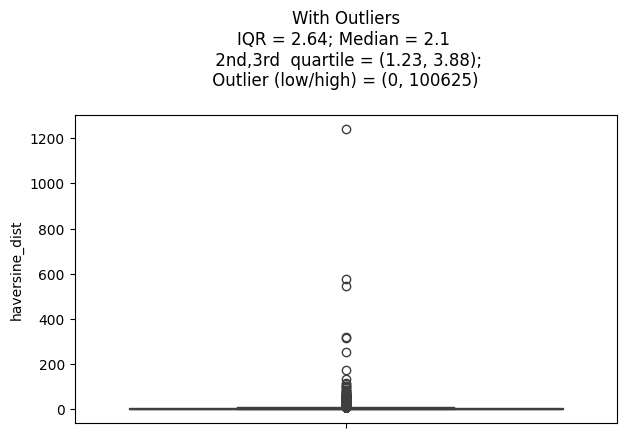

In [38]:
UVA_outlier(data, ['trip_duration'],)
UVA_outlier(data, ['haversine_dist'] )


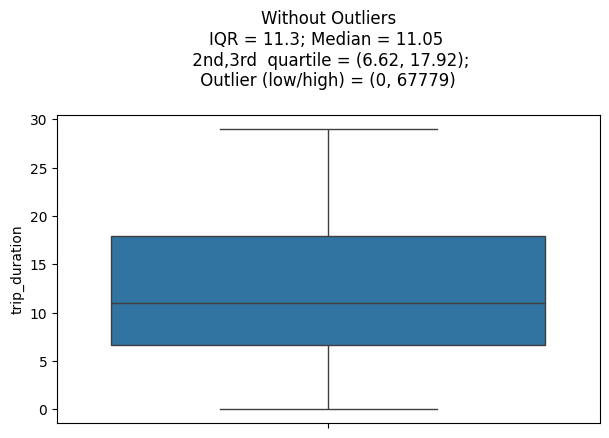

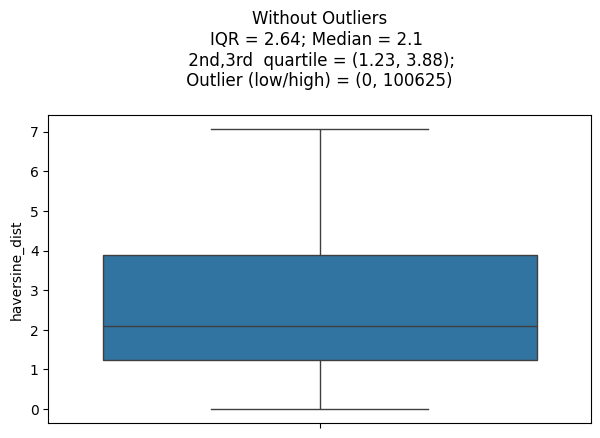

In [39]:
UVA_outlier(data, ['trip_duration'],include_outlier=False)
UVA_outlier(data, ['haversine_dist'],include_outlier=False )

In [40]:
#bivariane analysis of numberical-numberical
# isolating numerical datatypes only the three that I want to compare relationship correlation to understand high degree of collinearity
numerical = data.filter(['trip_duration','haversine_dist','hrs_of_day_pickup'], axis=1)
numerical.dtypes

,0
trip_duration,float64
haversine_dist,float64
hrs_of_day_pickup,int32


In [41]:
# calculating correlation
correlation = numerical.corr()
correlation

,trip_duration,haversine_dist,hrs_of_day_pickup
trip_duration,1.000000,0.125772,0.002979
haversine_dist,0.125772,1.000000,-0.016269
hrs_of_day_pickup,0.002979,-0.016269,1.000000


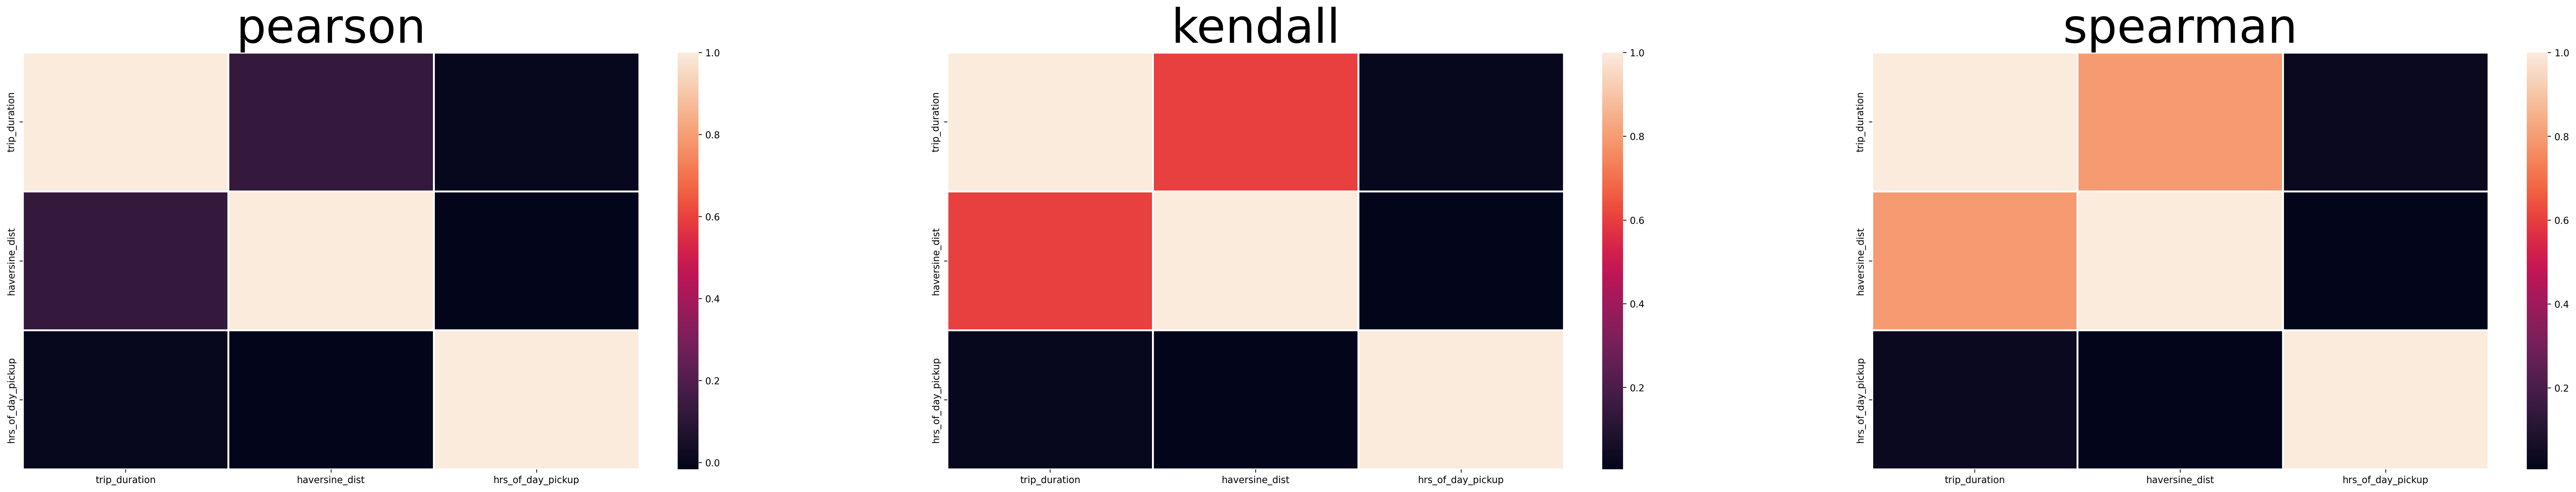

In [42]:
# plotting heatmap usill all methods for all numerical variables. I want to only compare trip duration and distance to see if there is any correlation and also seeing if pickup in the evening or morning has any difference.
plt.figure(figsize=(50,8), dpi=250)
for j,i in enumerate(['pearson','kendall','spearman']):
  plt.subplot(1,3,j+1)
  correlation = numerical.dropna().corr(method=i)
  sns.heatmap(correlation, linewidth = 2)
  plt.title(i, fontsize=50)

Bivariate analysis on continous categorical variable
List of hypothesis
   1. More passenger in the car takes more trip time
   2. Vendor_ID has a correlation for trip time
   3. Shorter distance will be used by 1 or 2 passenger people where as longer distance will be 3 or more people.

In [43]:
def TwoSampZ(X1, X2, sigma1, sigma2, N1, N2):
  '''
  takes mean, standard deviation, and number of observations and returns p-value calculated for 2-sampled Z-Test
  '''
  from numpy import sqrt, abs, round
  from scipy.stats import norm
  ovr_sigma = sqrt(sigma1**2/N1 + sigma2**2/N2)
  z = (X1 - X2)/ovr_sigma
  pval = 2*(1 - norm.cdf(abs(z)))
  return pval

In [44]:
def TwoSampT(X1, X2, sd1, sd2, n1, n2):
  '''
  takes mean, standard deviation, and number of observations and returns p-value calculated for 2-sample T-Test
  '''
  from numpy import sqrt, abs, round
  from scipy.stats import t as t_dist
  ovr_sd = sqrt(sd1**2/n1 + sd2**2/n2)
  t = (X1 - X2)/ovr_sd
  df = n1+n2-2
  pval = 2*(1 - t_dist.cdf(abs(t),df))
  return pval

In [48]:
def Bivariate_cont_cat(data, cont, cat, category):
  #creating 2 samples
  x1 = data[cont][data[cat]==category][:]
  x2 = data[cont][~(data[cat]==category)][:]

  #calculating descriptives
  n1, n2 = x1.shape[0], x2.shape[0]
  m1, m2 = x1.mean(), x2.mean()
  std1, std2 = x1.std(), x2.mean()

  #calculating p-values
  t_p_val = TwoSampT(m1, m2, std1, std2, n1, n2)
  z_p_val = TwoSampZ(m1, m2, std1, std2, n1, n2)

  #table
  table = pd.pivot_table(data=data, values=cont, columns=cat, aggfunc='mean')

  #plotting
  plt.figure(figsize = (15,6), dpi=140)

  #barplot
  plt.subplot(1,2,1)
  sns.barplot(x=[str(category), 'not {}'.format(category)], y=[m1, m2])
  plt.ylabel('mean {}'.format(cont))
  plt.xlabel(cat)
  plt.title('t-test p-value = {} \n z-test p-value = {}\n {}'.format(t_p_val,
                                                                z_p_val,
                                                                table))

  # boxplot
  plt.subplot(1,2,2)
  sns.boxplot(x=cat, y=cont, data=data)
  plt.title('categorical boxplot')

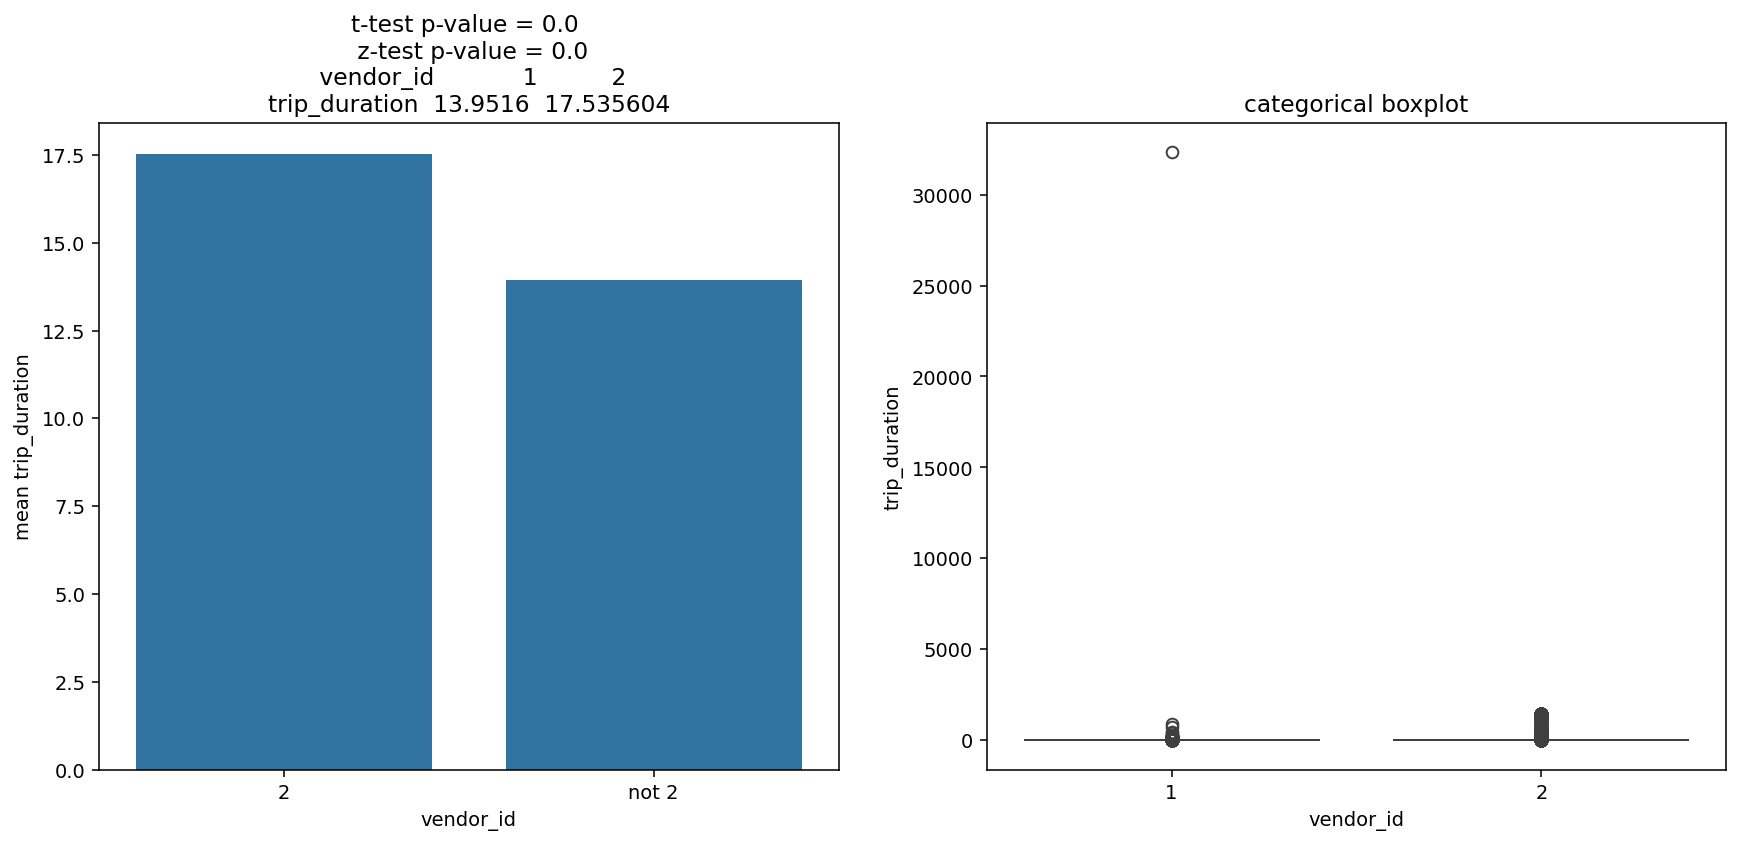

In [49]:
#comparing vendor_id with mean trip duration
Bivariate_cont_cat(data, 'trip_duration', 'vendor_id', 2)




<style type='text/css'>
.CodeMirror{
font-size: 17px;
</style>


Performing Model Prediction for Target Variable

In [54]:
#reviewing the data types one more time to perform variable transformation for categorical variable.
data.dtypes

,0
id,object
vendor_id,int64
pickup_datetime,object
dropoff_datetime,object
passenger_count,int64
pickup_longitude,float64
pickup_latitude,float64
dropoff_longitude,float64
dropoff_latitude,float64
store_and_fwd_flag,object


In [ ]:
# Dropping latitude and longitude variable to remove multicollinearity as we used these variable to transform into a distance variable.
data = data.drop(['diff_in_pickup_longitude','diff_in_pickup_latitude'],axis=1)

In [58]:
dummies = pd.get_dummies(data['store_and_fwd_flag'])

In [59]:
data = pd.concat([data.drop(['store_and_fwd_flag'],axis=1),dummies],axis=1)

In [61]:
#dropping date time columns that are already converted to its month, year and day.
data = data.drop(['pickup_datetime','dropoff_datetime'],axis=1)

In [62]:
#Verifying our data types to make sure they are prediction model ready.
data.dtypes

,0
id,object
vendor_id,int64
passenger_count,int64
pickup_longitude,float64
pickup_latitude,float64
dropoff_longitude,float64
dropoff_latitude,float64
trip_duration,float64
doy_ls_tran_pickup,int32
moy_ls_tran_pickup,int32


In [64]:
def direction_lookup(data,destination_x, origin_x, destination_y, origin_y):

    deltaX = data.loc[destination_x] - data.loc[origin_x]

    deltaY = data.loc[destination_y] - data.loc[origin_y]

    degrees_temp = math.atan2(deltaX, deltaY)/math.pi*180

    if degrees_temp < 0:

        degrees_final = 360 + degrees_temp

    else:

        degrees_final = degrees_temp

    compass_brackets = ["N", "NE", "E", "SE", "S", "SW", "W", "NW", "N"]

    compass_lookup = round(degrees_final / 45)

    return compass_brackets[compass_lookup]

In [65]:
#finding direction of travel
for h in data:

    data['h'] =data.apply(direction_lookup, axis=1, args =('dropoff_longitude','pickup_longitude','dropoff_latitude','pickup_latitude'))

In [68]:
#mapping direction of travel to hot encoding
data['direction_of_Travel_cat'] = data['h'].map({'N':0, 'NE':1, 'E':2, 'SE':3, 'S':4, 'SW':5, 'W':6, 'NW':7})
data = data.drop(['h'],axis = 1)

In [69]:
data

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,doy_ls_tran_pickup,moy_ls_tran_pickup,dow_ls_tran_pickup,hrs_of_day_pickup,minute_of_day_pickup,seconds_of_day_pickup,doy_ls_tran_drop_off,moy_ls_tran_drop_off,dow_ls_tran_drop_off,hrs_of_day_drop_off,minute_of_day_drop_off,seconds_of_day_drop_off,haversine_dist,N,Y,direction_of_Travel_cat
0,id1080784,2,1,-73.953918,40.778873,-73.963875,40.771164,6.666667,60,2,0,16,40,21,60,2,0,16,47,1,1.199073,True,False,5
1,id0889885,1,2,-73.988312,40.731743,-73.994751,40.694931,18.333333,71,3,4,23,35,37,71,3,4,23,53,57,4.129111,True,False,4
2,id0857912,2,2,-73.997314,40.721458,-73.948029,40.774918,27.250000,52,2,6,17,59,33,52,2,6,18,26,48,7.250753,True,False,1
3,id3744273,2,6,-73.961670,40.759720,-73.956779,40.780628,19.016667,5,1,1,9,44,31,5,1,1,10,3,32,2.361097,True,False,0
4,id0232939,1,1,-74.017120,40.708469,-73.988182,40.740631,14.133333,48,2,2,6,42,23,48,2,2,6,56,31,4.328534,True,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
729317,id3905982,2,2,-73.965919,40.789780,-73.952637,40.789181,4.933333,142,5,5,13,29,38,142,5,5,13,34,34,1.120223,True,False,2
729318,id0102861,1,1,-73.996666,40.737434,-74.001320,40.731911,5.250000,53,2,0,0,43,11,53,2,0,0,48,26,0.728705,True,False,5
729319,id0439699,1,1,-73.997849,40.761696,-74.001488,40.741207,11.216667,106,4,4,18,56,48,106,4,4,19,8,1,2.298776,True,False,4
729320,id2078912,1,1,-74.006706,40.708244,-74.013550,40.713814,7.450000,171,6,6,9,50,47,171,6,6,9,58,14,0.846316,True,False,7


In [70]:
#finding outliers within numerical variables
data.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,doy_ls_tran_pickup,moy_ls_tran_pickup,dow_ls_tran_pickup,hrs_of_day_pickup,minute_of_day_pickup,seconds_of_day_pickup,doy_ls_tran_drop_off,moy_ls_tran_drop_off,dow_ls_tran_drop_off,hrs_of_day_drop_off,minute_of_day_drop_off,seconds_of_day_drop_off,haversine_dist,direction_of_Travel_cat
count,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.00000,729322.000000,729322.000000,729322.000000,729322.000000
mean,1.535403,1.662055,-73.973513,40.750919,-73.973422,40.751775,15.870486,91.882577,3.518410,3.049081,13.611698,29.597785,29.468642,91.893805,3.518764,3.053015,13.60616,29.631301,29.504039,3.441139,3.189793
std,0.498745,1.312446,0.069754,0.033594,0.069588,0.036037,64.410437,51.555655,1.680661,1.954470,6.402853,17.332400,17.316949,51.556407,1.680815,1.956866,6.48637,17.420089,17.322411,4.353132,2.208622
min,1.000000,0.000000,-121.933342,34.712234,-121.933304,32.181141,0.016667,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,-73.991859,40.737335,-73.991318,40.735931,6.616667,48.000000,2.000000,1.000000,9.000000,15.000000,14.000000,48.000000,2.000000,1.000000,9.00000,15.000000,15.000000,1.232695,1.000000
50%,2.000000,1.000000,-73.981758,40.754070,-73.979759,40.754509,11.050000,92.000000,4.000000,3.000000,14.000000,30.000000,29.000000,92.000000,4.000000,3.000000,14.00000,30.000000,29.000000,2.095672,3.000000
75%,2.000000,2.000000,-73.967361,40.768314,-73.963036,40.769741,17.916667,136.000000,5.000000,5.000000,19.000000,45.000000,44.000000,136.000000,5.000000,5.000000,19.00000,45.000000,45.000000,3.876481,5.000000
max,2.000000,9.000000,-65.897385,51.881084,-65.897385,43.921028,32328.933333,182.000000,6.000000,6.000000,23.000000,59.000000,59.000000,183.000000,7.000000,6.000000,23.00000,59.000000,59.000000,1240.908677,7.000000


In [71]:
# Trip duration and haversine distance has some outliers that needs to be addressed.

In [75]:
data['trip_duration'].quantile(0.25), data['trip_duration'].quantile(0.75)

(6.616666666666666, 17.916666666666668)

In [76]:
IQR = data['trip_duration'].quantile(0.75) - data['trip_duration'].quantile(0.25)
IQR

11.3

In [77]:
Q1 = data['trip_duration'].quantile(0.25)
Q3 = data['trip_duration'].quantile(0.75)

whisker_1 = Q1 - (1.5*IQR)
whisker_2 = Q3 + (1.5*IQR)

whisker_1, whisker_2

(-10.333333333333336, 34.866666666666674)

review trip outliers to see the entire data on it to see any crazy outliers/reasons. Same is for haversine distance

In [79]:
A = data['trip_duration'].loc[data['trip_duration']>34.8666]

In [80]:
sorted(A,reverse = True)

[32328.933333333334,
 1439.85,
 1439.7833333333333,
 1439.6333333333334,
 1439.6166666666666,
 1439.4833333333333,
 1439.4833333333333,
 1439.45,
 1439.4166666666667,
 1439.4,
 1439.3833333333334,
 1439.3666666666666,
 1439.3666666666666,
 1439.35,
 1439.35,
 1439.3333333333333,
 1439.3,
 1439.2833333333333,
 1439.2833333333333,
 1439.2666666666667,
 1439.2666666666667,
 1439.2666666666667,
 1439.25,
 1439.2333333333333,
 1439.2333333333333,
 1439.2333333333333,
 1439.2166666666667,
 1439.2166666666667,
 1439.2,
 1439.2,
 1439.1833333333334,
 1439.1833333333334,
 1439.1833333333334,
 1439.15,
 1439.15,
 1439.1166666666666,
 1439.1,
 1439.1,
 1439.1,
 1439.0833333333333,
 1439.0833333333333,
 1439.0833333333333,
 1439.0666666666666,
 1439.05,
 1439.0333333333333,
 1439.0,
 1439.0,
 1439.0,
 1439.0,
 1439.0,
 1438.9833333333333,
 1438.9833333333333,
 1438.9833333333333,
 1438.9666666666667,
 1438.95,
 1438.95,
 1438.9333333333334,
 1438.9333333333334,
 1438.9333333333334,
 1438.933333333

In [81]:
data.sort_values(by ='trip_duration', ascending = False)

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,doy_ls_tran_pickup,moy_ls_tran_pickup,dow_ls_tran_pickup,hrs_of_day_pickup,minute_of_day_pickup,seconds_of_day_pickup,doy_ls_tran_drop_off,moy_ls_tran_drop_off,dow_ls_tran_drop_off,hrs_of_day_drop_off,minute_of_day_drop_off,seconds_of_day_drop_off,haversine_dist,N,Y,direction_of_Travel_cat
21813,id1864733,1,1,-73.789650,40.643559,-73.956810,40.773087,32328.933333,5,1,1,0,19,42,27,1,2,11,8,38,20.148664,True,False,7
259437,id0593332,2,1,-73.781952,40.644688,-73.993874,40.745926,1439.850000,152,5,1,13,0,39,153,6,2,13,0,30,21.117104,True,False,7
119185,id2837671,2,1,-73.992279,40.749729,-73.962524,40.800770,1439.783333,182,6,3,16,37,52,183,7,4,16,37,39,6.203902,True,False,1
177225,id3782820,2,1,-73.781990,40.644722,-73.980675,40.724918,1439.633333,133,5,3,13,48,19,134,5,4,13,47,57,18.978561,True,False,6
496391,id2307896,2,1,-74.000504,40.732121,-73.994202,40.712418,1439.616667,135,5,5,4,48,5,136,5,6,4,47,42,2.254313,True,False,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
672240,id2072503,1,1,-73.807213,40.658192,-73.807259,40.658051,0.016667,20,1,2,5,53,45,20,1,2,5,53,46,0.016163,True,False,4
102646,id2536510,1,1,-73.940384,40.786423,-73.940300,40.786373,0.016667,108,4,6,11,44,49,108,4,6,11,44,50,0.008963,True,False,3
533760,id0948644,2,0,-73.987595,40.719997,-73.987595,40.720005,0.016667,53,2,0,0,40,25,53,2,0,0,40,26,0.000848,True,False,0
512833,id2697717,2,2,-73.983154,40.767159,-73.983238,40.767097,0.016667,87,3,6,12,55,52,87,3,6,12,55,53,0.009799,True,False,5


In [82]:
data['trip_duration'].loc[data['trip_duration']>34.8666] = whisker_2

<ipython-input-82-3612f8a0ad85>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['trip_duration'].loc[data['trip_duration']>34.8666] = whisker_2


In [83]:
data.sort_values(by ='trip_duration', ascending = False)

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,doy_ls_tran_pickup,moy_ls_tran_pickup,dow_ls_tran_pickup,hrs_of_day_pickup,minute_of_day_pickup,seconds_of_day_pickup,doy_ls_tran_drop_off,moy_ls_tran_drop_off,dow_ls_tran_drop_off,hrs_of_day_drop_off,minute_of_day_drop_off,seconds_of_day_drop_off,haversine_dist,N,Y,direction_of_Travel_cat
107822,id0048627,1,1,-73.789604,40.643089,-73.984245,40.766953,34.866667,142,5,5,0,3,22,142,5,5,0,43,29,21.421680,True,False,7
389021,id0389622,1,4,-74.002693,40.714214,-73.988655,40.749317,34.866667,160,6,2,12,36,33,160,6,2,13,29,50,4.078550,True,False,0
689576,id3464017,2,6,-73.994644,40.750416,-73.932335,40.686874,34.866667,84,3,3,0,47,27,84,3,3,1,35,17,8.803215,True,False,3
235426,id3879680,2,5,-73.950890,40.776848,-74.006668,40.705887,34.866667,142,5,5,23,54,5,143,5,6,0,30,16,9.183841,True,False,5
268406,id1548574,1,1,-73.991920,40.750095,-73.989075,40.667171,34.866667,120,4,4,11,2,23,120,4,4,11,57,14,9.223835,True,False,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
672240,id2072503,1,1,-73.807213,40.658192,-73.807259,40.658051,0.016667,20,1,2,5,53,45,20,1,2,5,53,46,0.016163,True,False,4
102646,id2536510,1,1,-73.940384,40.786423,-73.940300,40.786373,0.016667,108,4,6,11,44,49,108,4,6,11,44,50,0.008963,True,False,3
533760,id0948644,2,0,-73.987595,40.719997,-73.987595,40.720005,0.016667,53,2,0,0,40,25,53,2,0,0,40,26,0.000848,True,False,0
512833,id2697717,2,2,-73.983154,40.767159,-73.983238,40.767097,0.016667,87,3,6,12,55,52,87,3,6,12,55,53,0.009799,True,False,5


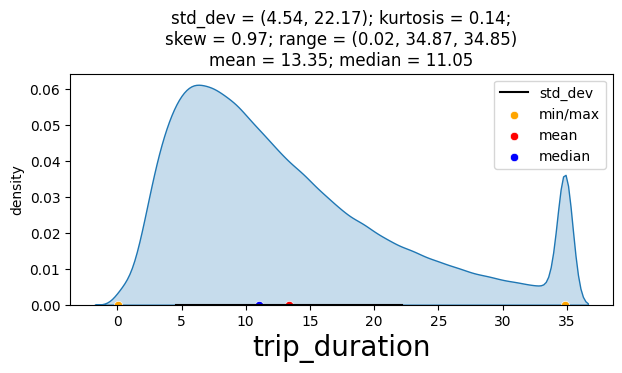

In [85]:
#trip duration after changing outliers to whisker_3.

UVA_numeric(data, ['trip_duration'])

In [86]:
IQR1 = data['haversine_dist'].quantile(0.75) - data['haversine_dist'].quantile(0.25)
IQR1



2.643786067322629

In [87]:
#finding whiskers of haversine dist
Q11 = data['haversine_dist'].quantile(0.25)
Q33 = data['haversine_dist'].quantile(0.75)

whisker_11 = Q11 - (1.5*IQR)
whisker_22 = Q33 + (1.5*IQR)

whisker_11, whisker_22

(-15.717304966838503, 20.82648110048413)

In [88]:
data.sort_values(by ='haversine_dist', ascending = False)

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,doy_ls_tran_pickup,moy_ls_tran_pickup,dow_ls_tran_pickup,hrs_of_day_pickup,minute_of_day_pickup,seconds_of_day_pickup,doy_ls_tran_drop_off,moy_ls_tran_drop_off,dow_ls_tran_drop_off,hrs_of_day_drop_off,minute_of_day_drop_off,seconds_of_day_drop_off,haversine_dist,N,Y,direction_of_Travel_cat
244913,id2306955,1,1,-72.809669,51.881084,-73.987228,40.750599,13.200000,128,5,5,18,58,53,128,5,5,19,12,5,1240.908677,True,False,4
621372,id2644780,1,2,-73.991325,40.750023,-79.518616,43.921028,34.866667,124,5,1,16,24,7,124,5,1,17,18,34,574.875442,True,False,7
441429,id0982904,1,2,-73.870682,40.773598,-79.817978,38.963852,34.866667,119,4,3,13,32,14,119,4,3,14,14,9,545.853499,True,False,6
654569,id0116374,1,1,-74.007095,40.717113,-76.963242,38.946033,4.700000,93,4,5,20,33,19,93,4,5,20,38,1,320.125775,True,False,5
697620,id0978162,1,4,-75.354332,34.712234,-73.834923,32.181141,14.583333,55,2,2,16,20,59,55,2,2,16,35,34,314.764203,True,False,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712763,id2574599,1,1,-73.994698,40.750404,-73.994698,40.750404,0.133333,38,2,6,11,23,38,38,2,6,11,23,46,0.000000,True,False,0
52157,id0627234,2,1,-73.972588,40.760632,-73.972588,40.760632,27.050000,176,6,4,17,26,39,176,6,4,17,53,42,0.000000,True,False,0
309678,id2389047,1,1,-73.869469,40.772755,-73.869469,40.772755,0.066667,91,3,3,11,55,37,91,3,3,11,55,41,0.000000,True,False,0
547442,id0130023,2,1,-73.947281,40.771080,-73.947281,40.771080,6.333333,118,4,2,10,5,46,118,4,2,10,12,6,0.000000,True,False,0


In [104]:
data["N"].value_counts()

,count
N,
True,725282
False,4040


In [105]:
data['N'] = data['N'].map({False:0, True:1})
data['Y'] = data['Y'].map({False:0, True:1})

In [106]:
data['haversine_dist'].loc[data['haversine_dist']>34.8666] = whisker_22

<ipython-input-106-54f9b24256b7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['haversine_dist'].loc[data['haversine_dist']>34.8666] = whisker_22


In [110]:
#preparing our data for running machine learning algorithms and regression.
data_clean = data.copy()
data_clean = data_clean.drop(['id', 'pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude'],axis=1)

In [98]:
data_clean.head()

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,doy_ls_tran_pickup,moy_ls_tran_pickup,dow_ls_tran_pickup,hrs_of_day_pickup,minute_of_day_pickup,seconds_of_day_pickup,doy_ls_tran_drop_off,moy_ls_tran_drop_off,dow_ls_tran_drop_off,hrs_of_day_drop_off,minute_of_day_drop_off,seconds_of_day_drop_off,haversine_dist,N,Y,direction_of_Travel_cat
0,id1080784,2,1,-73.953918,40.778873,-73.963875,40.771164,6.666667,60,2,0,16,40,21,60,2,0,16,47,1,1.199073,True,False,5
1,id0889885,1,2,-73.988312,40.731743,-73.994751,40.694931,18.333333,71,3,4,23,35,37,71,3,4,23,53,57,4.129111,True,False,4
2,id0857912,2,2,-73.997314,40.721458,-73.948029,40.774918,27.250000,52,2,6,17,59,33,52,2,6,18,26,48,7.250753,True,False,1
3,id3744273,2,6,-73.961670,40.759720,-73.956779,40.780628,19.016667,5,1,1,9,44,31,5,1,1,10,3,32,2.361097,True,False,0
4,id0232939,1,1,-74.017120,40.708469,-73.988182,40.740631,14.133333,48,2,2,6,42,23,48,2,2,6,56,31,4.328534,True,False,1


In [111]:
#Splitting our target variables from the features
x = data_clean.drop(['trip_duration'],axis = 1)
y = data_clean['trip_duration']

In [112]:
#Importing our train test split to split the model for training and validation
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y =train_test_split(x,y,random_state=42)

In [113]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_absolute_error as mae

In [114]:
#initializing Linear regression models
lr = LR()
lr.fit(train_x,train_y)

LinearRegression()

In [115]:
# Predicting over the Train Set and calculating error
train_predict = lr.predict(train_x)
k = mae(train_predict, train_y)
print('Training Mean Absolute Error', k )

Training Mean Absolute Error 4.4245512606616595


In [116]:
# Predicting over the Test Set and calculating error
test_predict = lr.predict(test_x)
k = mae(test_predict, test_y)
print('Test Mean Absolute Error    ', k )

Test Mean Absolute Error     4.433665278897404


Insights: Our Test Mean Absolute Error for both test and train sets are around 4.4 and hence we can conclude that our model is generalizing well and not subject to overfitting or underfitting

In [117]:
lr.coef_

array([-3.93353958e-02,  4.52093458e-02, -4.00651444e+01,  1.26227794e+00,
       -7.84403771e-01, -1.69598568e+00, -2.93553776e-02, -9.63204491e-04,
        4.00714649e+01, -1.23420358e+00,  6.40883461e-01,  1.75899102e+00,
        2.70697698e-02,  4.83832859e-04,  1.59894970e+00, -9.66322336e-02,
        9.66322336e-02, -4.74504741e-03])

Text(0.5, 1.0, 'Coefficient plot')

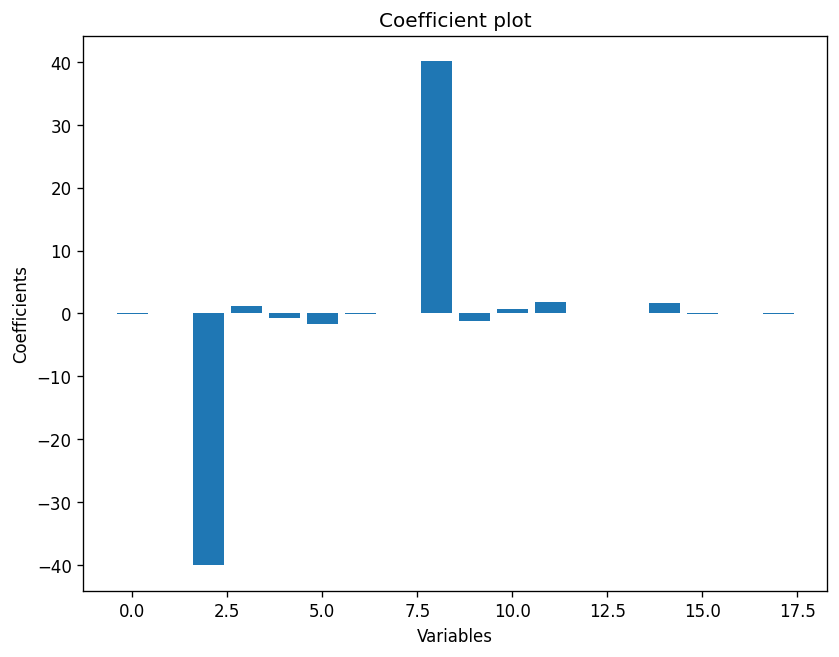

In [120]:
plt.figure(figsize=(8, 6), dpi=120, facecolor='w', edgecolor='b')
x = range(len(train_x.columns))
y = lr.coef_
plt.bar( x, y )
plt.xlabel( "Variables")
plt.ylabel('Coefficients')
plt.title('Coefficient plot')

In [121]:
# Arranging and calculating the Residuals
residuals = pd.DataFrame({
    'fitted values' : test_y,
    'predicted values' : test_predict,
})

residuals['residuals'] = residuals['fitted values'] - residuals['predicted values']
residuals

,fitted values,predicted values,residuals
469114,10.950000,11.168042,-0.218042
694852,3.250000,8.318395,-5.068395
696324,14.000000,21.395082,-7.395082
356496,6.633333,9.515168,-2.881834
645318,11.366667,14.026093,-2.659426
...,...,...,...
364573,22.283333,28.855271,-6.571937
218231,10.116667,12.401818,-2.285151
458768,7.383333,12.211303,-4.827970
194601,24.916667,16.156276,8.760391


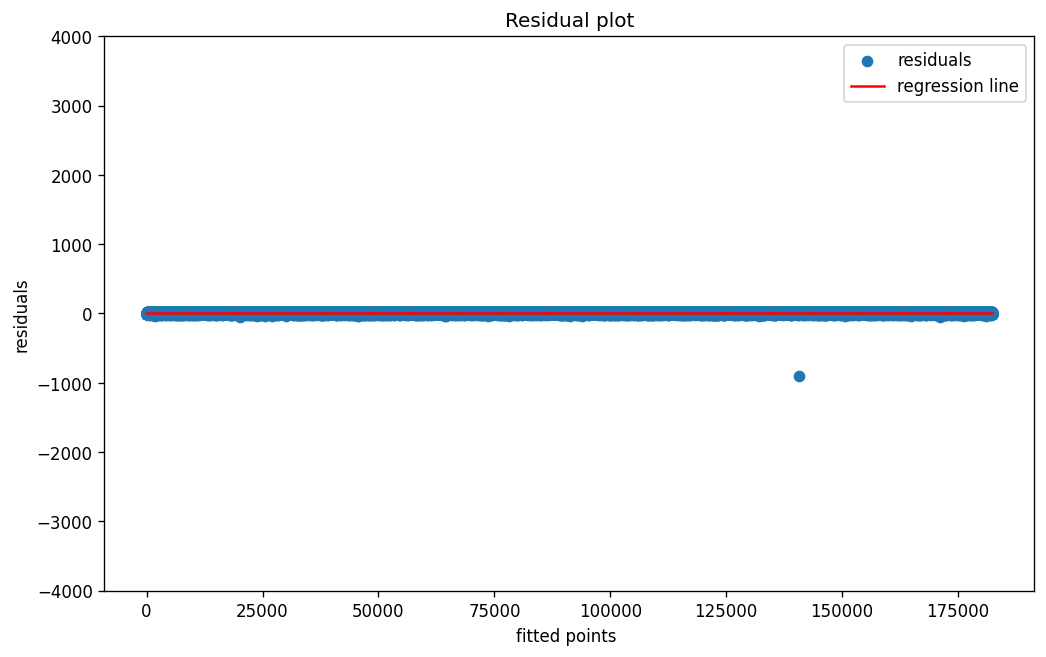

In [122]:
plt.figure(figsize=(10, 6), dpi=120, facecolor='w', edgecolor='b')
f = range(0,182331)
k = [0 for i in range(0,182331)]
plt.scatter( f, residuals.residuals[:], label = 'residuals')
plt.plot( f, k , color = 'red', label = 'regression line' )
plt.xlabel('fitted points ')
plt.ylabel('residuals')
plt.title('Residual plot')
plt.ylim(-4000, 4000)
plt.legend()

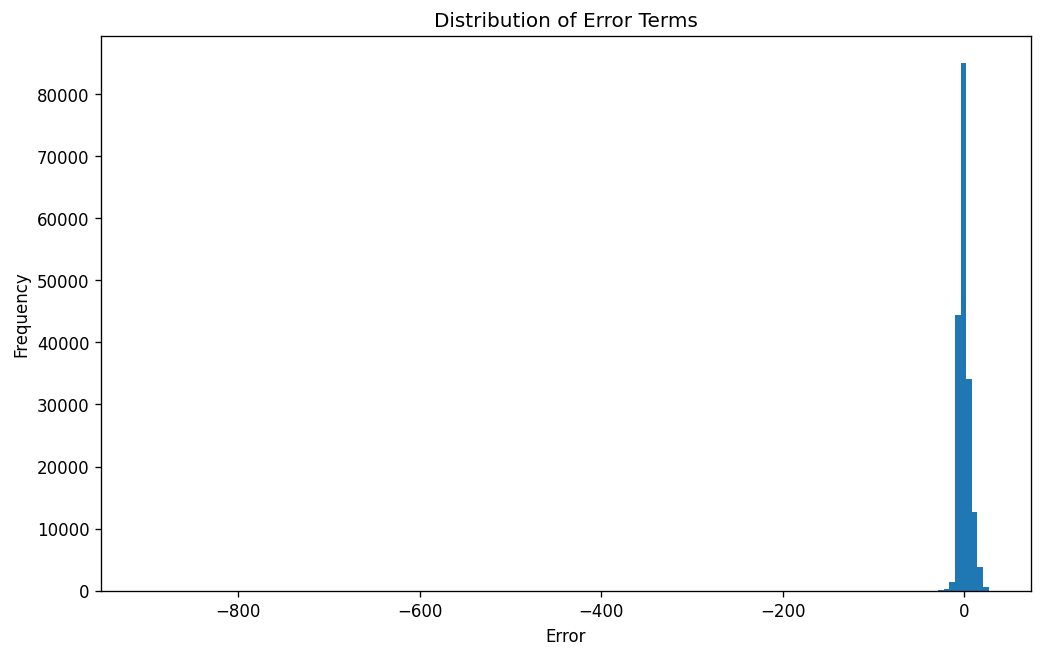

In [123]:
# Histogram for distribution
plt.figure(figsize=(10, 6), dpi=120, facecolor='w', edgecolor='b')
plt.hist(residuals.residuals, bins = 150)
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Distribution of Error Terms')
plt.show()

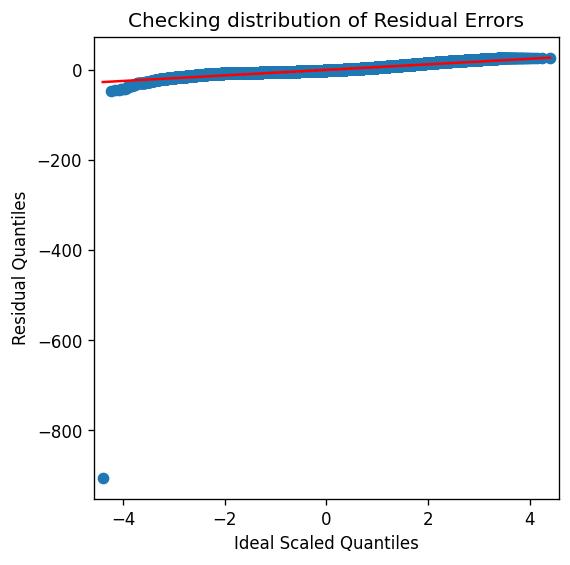

In [124]:
# importing the QQ-plot from the from the statsmodels

import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot

## Plotting the QQ plot
fig, ax = plt.subplots(figsize=(5,5) , dpi = 120)
qqplot(residuals.residuals, line = 's' , ax = ax)
plt.ylabel('Residual Quantiles')
plt.xlabel('Ideal Scaled Quantiles')
plt.title('Checking distribution of Residual Errors')
plt.show()

In [127]:
# Creating instance of Linear Regresssion with normalizing variables using standard scaler to be in same scale
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the training data
train_x_scaled = scaler.fit_transform(train_x)

# Now fit the model using the scaled features
lr.fit(train_x_scaled, train_y)

LinearRegression()

In [128]:
# Predicting over the Train Set and calculating error
train_predict = lr.predict(train_x)
k = mae(train_predict, train_y)
print('Training Mean Absolute Error', k )

Training Mean Absolute Error 82.96623851729795


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [129]:
# Predicting over the Test Set and calculating error
test_predict = lr.predict(test_x)
k = mae(test_predict, test_y)
print('Test Mean Absolute Error    ', k )

Test Mean Absolute Error     83.6511488652692


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


Text(0.5, 1.0, 'Normalized Coefficient plot')

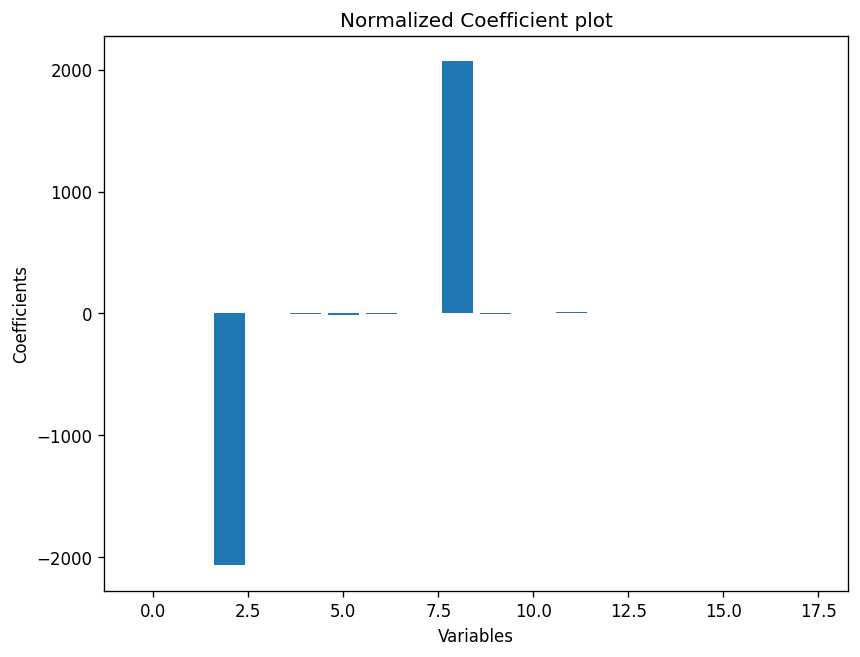

In [130]:
plt.figure(figsize=(8, 6), dpi=120, facecolor='w', edgecolor='b')
x = range(len(train_x.columns))
y = lr.coef_
plt.bar( x, y )
plt.xlabel( "Variables")
plt.ylabel('Coefficients')
plt.title('Normalized Coefficient plot')

In [131]:
x = data_clean.drop(['trip_duration'], axis=1)
y = data_clean['trip_duration']
x.shape , y.shape

((729322, 18), (729322,))

In [132]:
Coefficients = pd.DataFrame({
    'Variable'    : x.columns,
    'coefficient' : lr.coef_
})
Coefficients.head()

,Variable,coefficient
0,vendor_id,-0.019618
1,passenger_count,0.059320
2,doy_ls_tran_pickup,-2065.781992
3,moy_ls_tran_pickup,2.121582
4,dow_ls_tran_pickup,-1.531503


In [133]:
#trying a higher coefficient model just to see if it makes sense to only isolate few variables vs a lot of variables.
sig_var = Coefficients[Coefficients.coefficient > 1]

In [134]:
sig_var

,Variable,coefficient
3,moy_ls_tran_pickup,2.121582
8,doy_ls_tran_drop_off,2066.142324
10,dow_ls_tran_drop_off,1.252819
11,hrs_of_day_drop_off,11.402060
14,haversine_dist,6.235088


In [135]:
subset = data[sig_var['Variable'].values]
subset.head()

,moy_ls_tran_pickup,doy_ls_tran_drop_off,dow_ls_tran_drop_off,hrs_of_day_drop_off,haversine_dist
0,2,60,0,16,1.199073
1,3,71,4,23,4.129111
2,2,52,6,18,7.250753
3,1,5,1,10,2.361097
4,2,48,2,6,4.328534
